# Automatas Celulares:

**Eduardo Carrasco Vidal**

## Creación de un Elementary Celular Automata (Unidimensional):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# determinamos el estado inicial en forma aleatoria, con valores binarios y rango (tamaño de la grilla)
def inicial_random(tamano):
    estado_inicial_r = [random.randint(0, 1) for _ in range(tamano)]
    return estado_inicial_r

In [2]:
# con esta función determinamos un estado inicial seteado al centro.
def inicial_seteado(tamano):
    # generamos una lista de 0 por el tamaño
    estado_inicial_s = [0] * tamano
    # con esto dejamos el del medio, divide la grilla en 2 y deja el del medio en 1
    estado_inicial_s[tamano // 2] = 1
    return estado_inicial_s

In [3]:
# ALT:
def regla_binaria(numero_regla, r):
    width = 2 ** (2 * r + 1)
    binario = np.binary_repr(numero_regla, width=width)
    return {np.binary_repr(i, width=2 * r + 1): int(x) for i, x in enumerate(reversed(binario))}
# ALT

In [4]:
# ALT:
def siguiente_generacion(celdas, regla, r):
    tamano = len(celdas)
    celdas_ext = np.pad(celdas, pad_width=r, mode='wrap')
    vecindarios = [celdas_ext[i:i+2*r+1] for i in range(tamano)]
    vecindarios_str = [''.join(str(x) for x in vec) for vec in vecindarios]
    return np.array([regla[vec_str] for vec_str in vecindarios_str])
# ALT

In [5]:
# ALT
def automata_celular(numero_regla, n_generaciones, tamano, estado_inicial, r):
    regla = regla_binaria(numero_regla, r)
    generaciones = [estado_inicial]
    for _ in range(n_generaciones - 1):
        nueva_gen = siguiente_generacion(generaciones[-1], regla, r)
        generaciones.append(nueva_gen)
    return np.vstack(generaciones)
# ALT

In [6]:
## función para calcular el patron de comportamiento
def patron_ciclo(automata):
    n_filas = len(automata) #total generaciones
    # se generan dos ciclos para i (estado inicial) y j (estado inicial + 1 "siguiente")
    for i in range(n_filas):
        for j in range(i + 1, n_filas):
            #comparamos ambos ciclos
            if np.array_equal(automata[i], automata[j]):
                # si son iguales, el período se resta al otro (j-i)
                return j - i
    # caso contrario, la función dice None            
    return 'No hay ciclo'

In [7]:
def visualizar_automata(automata):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    print(f"  Número de Regla de Wolfram: {numero_regla}")
    print(f"  Número de Generaciones: {n_generaciones}")
    print(f"  Tamaño de la grilla: {tamano}")
    print(f"  Período del Ciclo: {periodo_ciclo}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.show()

### Métricas:

#### Densidad de 1's:
Qué tan lleno está el autómata (celdas activas)

In [8]:
# Evolución de la densidad de 1, por generación.
def calcular_densidad(automata):
    #sumamos los valores y dividimos por el shape, tamaño grilla
    densidades = np.sum(automata, axis=1) / automata.shape[1]
    return densidades

In [9]:
def graficar_densidad(densidades):
    plt.plot(densidades)
    plt.xlabel('Generación')
    plt.ylabel('Densidad de 1')
    plt.title('Densidad de 1 por generación')
    plt.show()

#### Entropía:
Medida de incertidumbre o desorden, puede interpretarse como la incertidumbre en el estado de una celda, dada la distribución de estados en una generación.

In [10]:
from scipy.stats import entropy
def calcular_entropia(automata):
    entropias = []
    for fila in automata:
        # Contamos la cantidad de 1 y 0 en cada fila
        unique, counts = np.unique(fila, return_counts=True)
        frecuencias = dict(zip(unique, counts))
        # Calculamos la probabilidad de 0 y 1 en cada fila
        probs = [frecuencias.get(i, 0) / len(fila) for i in [0, 1]]
        entropias.append(entropy(probs, base=2))
    return np.array(entropias)

In [11]:
def graficar_entropia(entropias):
    plt.plot(entropias)
    plt.xlabel('Generación')
    plt.ylabel('Entropía')
    plt.title('Entropía por generación')
    plt.show()

### Regla 190

  Número de Regla de Wolfram: 190
  Número de Generaciones: 100
  Tamaño de la grilla: 200
  Período del Ciclo: No hay ciclo


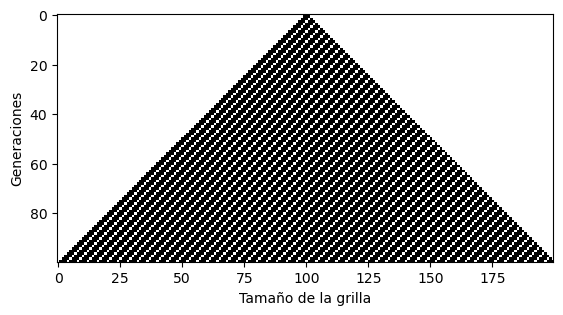

In [12]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 190
n_generaciones = 100
tamano = 200
r = 1
estado_inicial = inicial_seteado(tamano) #random o seteado

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial, r)
periodo_ciclo = patron_ciclo(automata)
visualizar_automata(automata)

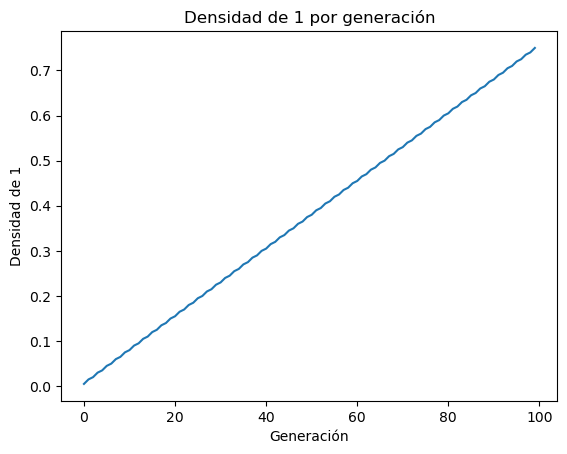

In [18]:
# Cálculo y gráfico de la densidad de 1:
densidades = calcular_densidad(automata)
graficar_densidad(densidades)

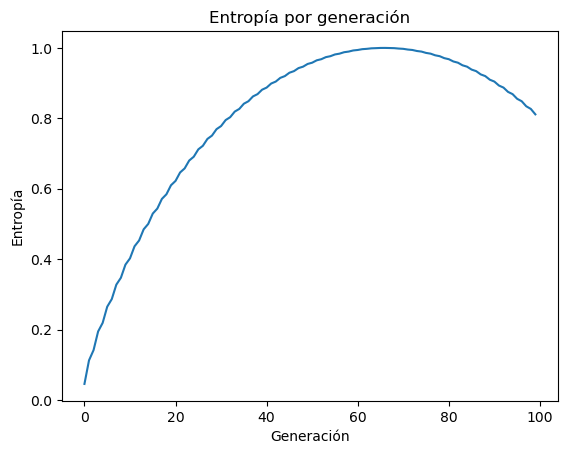

In [19]:
# Cálculo y gráfico de la entropía en f de las generaciones:
entropias = calcular_entropia(automata)
graficar_entropia(entropias)

In [20]:
automata[:,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 1, 1]])

In [21]:
## Representación binaria de la primera regla
## se puede usar para cualquier representación binaria
np.binary_repr(numero_regla, width=8)

'10111110'

In [22]:
n_filas = len(automata)
n_filas

100

In [23]:
periodo_ciclo = patron_ciclo(automata)
periodo_ciclo

'No hay ciclo'

## Regla 30:

  Número de Regla de Wolfram: 30
  Número de Generaciones: 100
  Tamaño de la grilla: 200
  Período del Ciclo: No hay ciclo


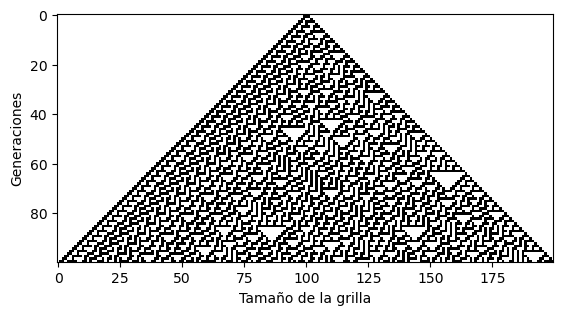

In [13]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 30
n_generaciones = 100
tamano = 200
estado_inicial = inicial_seteado(tamano) #random o seteado
r = 1

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial, r)
periodo_ciclo = patron_ciclo(automata)
visualizar_automata(automata)

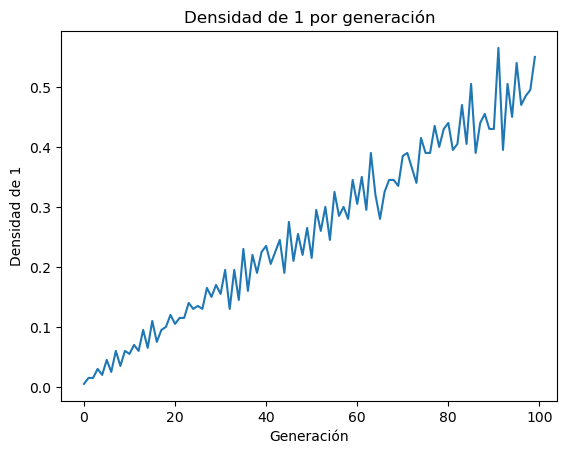

In [26]:
# Cálculo y gráfico de la densidad de 1:
densidades = calcular_densidad(automata)
graficar_densidad(densidades)

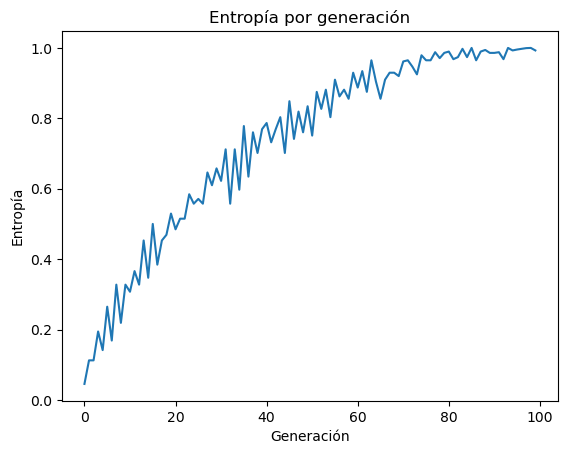

In [27]:
# Cálculo y gráfico de la entropía en f de las generaciones:
entropias = calcular_entropia(automata)
graficar_entropia(entropias)

### Regla 110:

  Número de Regla de Wolfram: 110
  Número de Generaciones: 100
  Tamaño de la grilla: 200
  Período del Ciclo: No hay ciclo


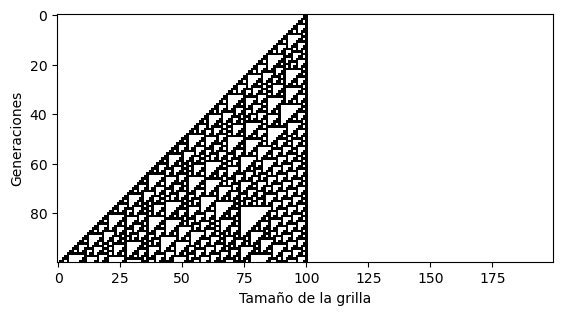

In [14]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 110
n_generaciones = 100
tamano = 200
estado_inicial = inicial_seteado(tamano) #random o seteado
r=1

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial, r)
periodo_ciclo = patron_ciclo(automata)
visualizar_automata(automata)

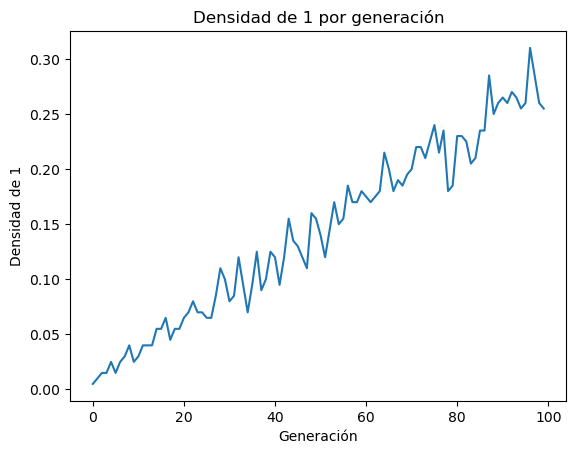

In [29]:
# Cálculo y gráfico de la densidad de 1:
densidades = calcular_densidad(automata)
graficar_densidad(densidades)

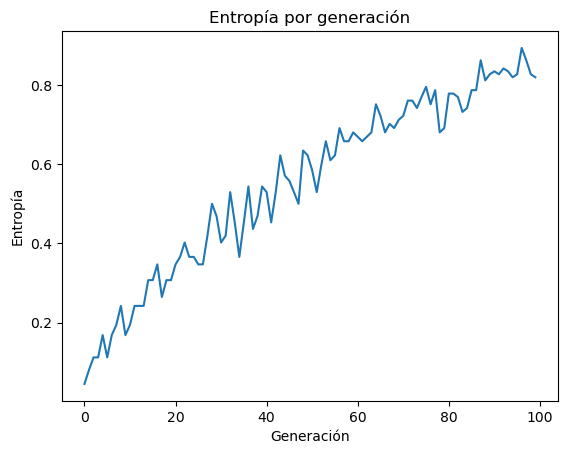

In [30]:
# Cálculo y gráfico de la entropía en f de las generaciones:
entropias = calcular_entropia(automata)
graficar_entropia(entropias)

### Regla 110:

  Número de Regla de Wolfram: 60
  Número de Generaciones: 100
  Tamaño de la grilla: 200
  Período del Ciclo: No hay ciclo


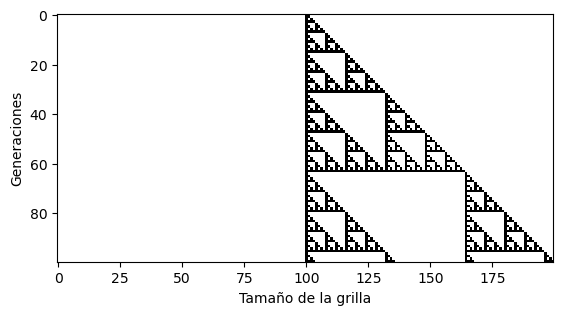

In [16]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 60
n_generaciones = 100
tamano = 200
estado_inicial = inicial_seteado(tamano)
r = 1

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial, r)
periodo_ciclo = patron_ciclo(automata)
visualizar_automata(automata)

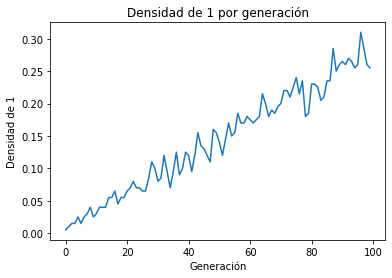

In [49]:
# Cálculo y gráfico de la densidad de 1:
densidades = calcular_densidad(automata)
graficar_densidad(densidades)

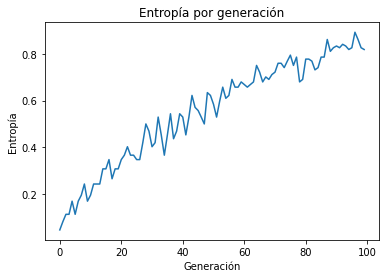

In [50]:
# Cálculo y gráfico de la entropía en f de las generaciones:
entropias = calcular_entropia(automata)
graficar_entropia(entropias)

### Regla 90:

In [15]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 60
n_generaciones = 100
tamano = 200
estado_inicial = inicial_seteado(tamano)

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
periodo_ciclo = patron_ciclo(automata)
visualizar_automata(automata)

TypeError: automata_celular() missing 1 required positional argument: 'r'

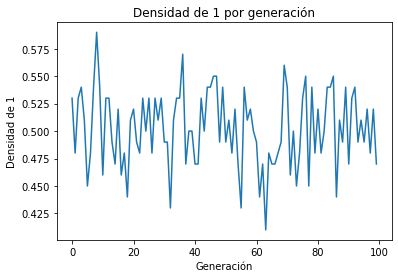

In [57]:
# Cálculo y gráfico de la densidad de 1:
densidades = calcular_densidad(automata)
graficar_densidad(densidades)

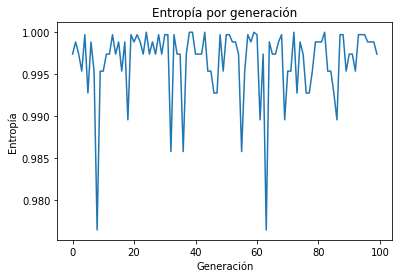

In [58]:
# Cálculo y gráfico de la entropía en f de las generaciones:
entropias = calcular_entropia(automata)
graficar_entropia(entropias)